In [1]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.5 MB/s eta 0:00:00


In [2]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=70d47268364ca6bf69f3ae3f219c06cb47bc1a350076f31b1e0133783eacb131
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [3]:
!pip install yfinance

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as pdr
import datetime as dt
from hmmlearn.hmm import GaussianHMM
import yfinance as yf

In [5]:
end_date = dt.date.today()
start_date = end_date - dt.timedelta(days = 6300)
ticker='^NSEI'

In [6]:
data= yf.download(ticker,start_date, end_date)
#data = pdr.get_data_yahoo(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900


In [8]:
data['Volatility'] = data['Close'].rolling(20).std()

In [9]:
data.dropna(inplace = True)

In [10]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility
Date,,,,,,,
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5670.399902,0,315.391206
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5668.049805,0,312.410514
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5559.299805,0,295.136269
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5351.000000,0,278.062852
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5215.299805,0,256.155762
...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893


In [11]:
X_train = data.loc[:'2019', ['Volatility']].values
X_test = data.loc['2020':, ['Volatility']].values

In [12]:
X_train

array([[315.39120642],
       [312.41051428],
       [295.13626903],
       ...,
       [131.37512351],
       [136.6822709 ],
       [137.23755166]])

In [13]:
hmm_model1 = GaussianHMM(n_components = 2, covariance_type="full", n_iter=1000).fit(X_train)

In [14]:
for i in range(hmm_model1.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", hmm_model1.means_[i])

0th hidden state
mean =  [96.54473553]
1th hidden state
mean =  [198.19930171]


#### 0 hidden state: Low Volatility, 1 hidden state: High Volatility

In [15]:
data.loc[:'2019','Regime'] = hmm_model1.predict(X_train)
data.loc['2020':,'Regime'] = hmm_model1.predict(X_test)

In [16]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime
Date,,,,,,,,
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5670.399902,0,315.391206,1.0
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5668.049805,0,312.410514,1.0
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5559.299805,0,295.136269,1.0
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5351.000000,0,278.062852,1.0
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5215.299805,0,256.155762,1.0
...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0


In [17]:
data['SMA'] = data['Close'].rolling(50).mean()
data['Diff_SMA'] = data['Close'].rolling(12).mean() - data['Close'].rolling(24).mean()

In [18]:
data.dropna(inplace = True)

In [19]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA
Date,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028
...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382


In [20]:
Y_train = data.loc[:'2019', ['Diff_SMA']].values
Y_test = data.loc['2020':, ['Diff_SMA']].values

In [21]:
hmm_model2 = GaussianHMM(n_components = 2, covariance_type="full", n_iter=1000).fit(Y_train)

In [22]:
for i in range(hmm_model2.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", hmm_model2.means_[i])

0th hidden state
mean =  [-85.38704836]
1th hidden state
mean =  [84.47317245]


In [23]:
data.loc[:'2019','Trend'] = hmm_model2.predict(Y_train)
data.loc['2020':,'Trend'] = hmm_model2.predict(Y_test)

In [24]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend
Date,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0


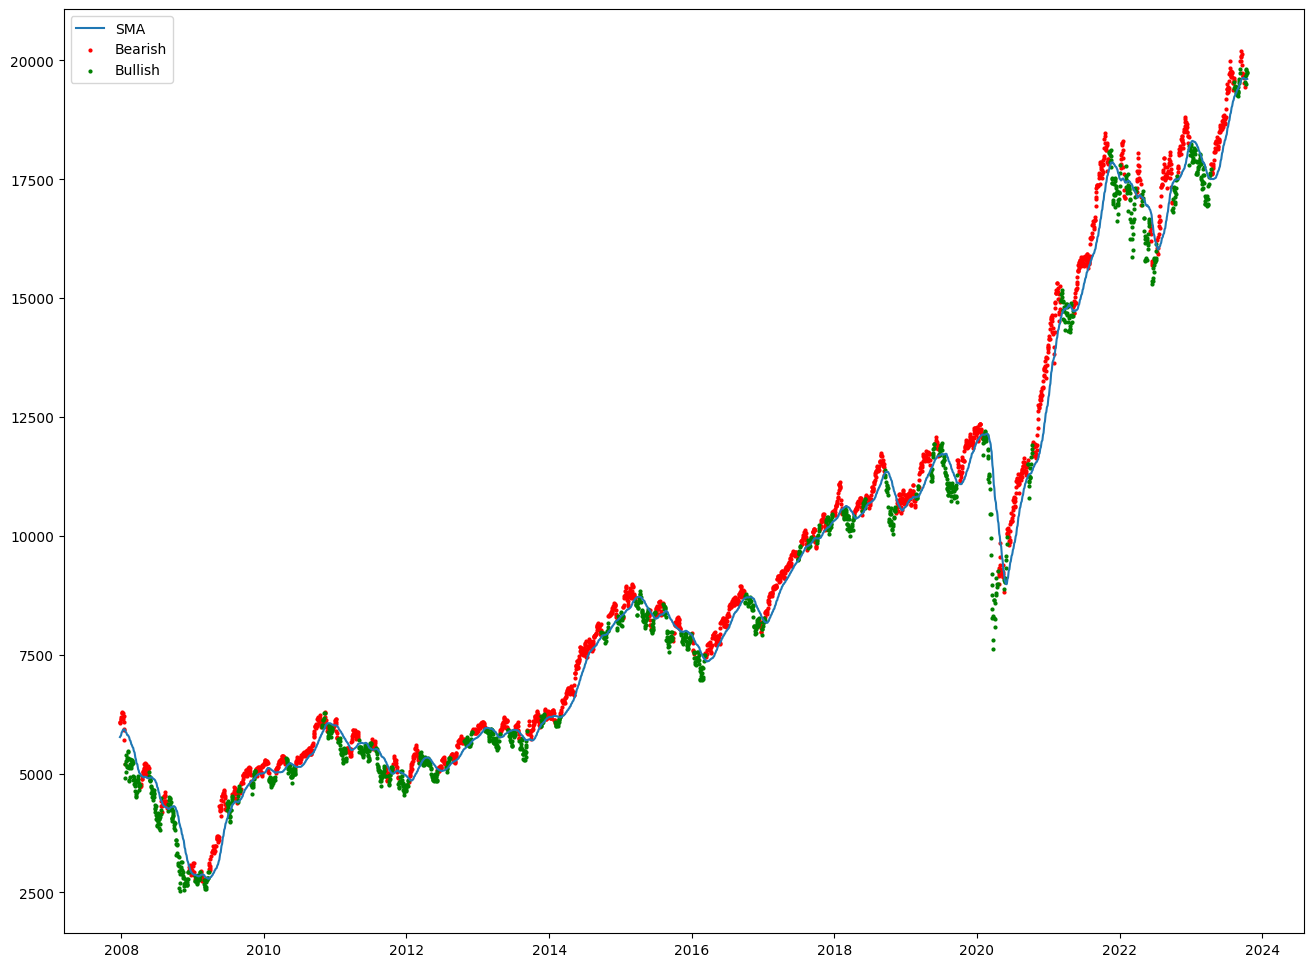

In [25]:
plt.figure(figsize = (16,12))
plt.plot(data.index, data['SMA'], label = 'SMA')
plt.scatter(data[data['Trend']==1].index, data[data['Trend'] == 1]['Close'], s = 4, label = 'Bearish', c = 'red')
plt.scatter(data[data['Trend']==0].index, data[data['Trend'] == 0]['Close'], s = 4, label = 'Bullish', c = 'green')
plt.legend()

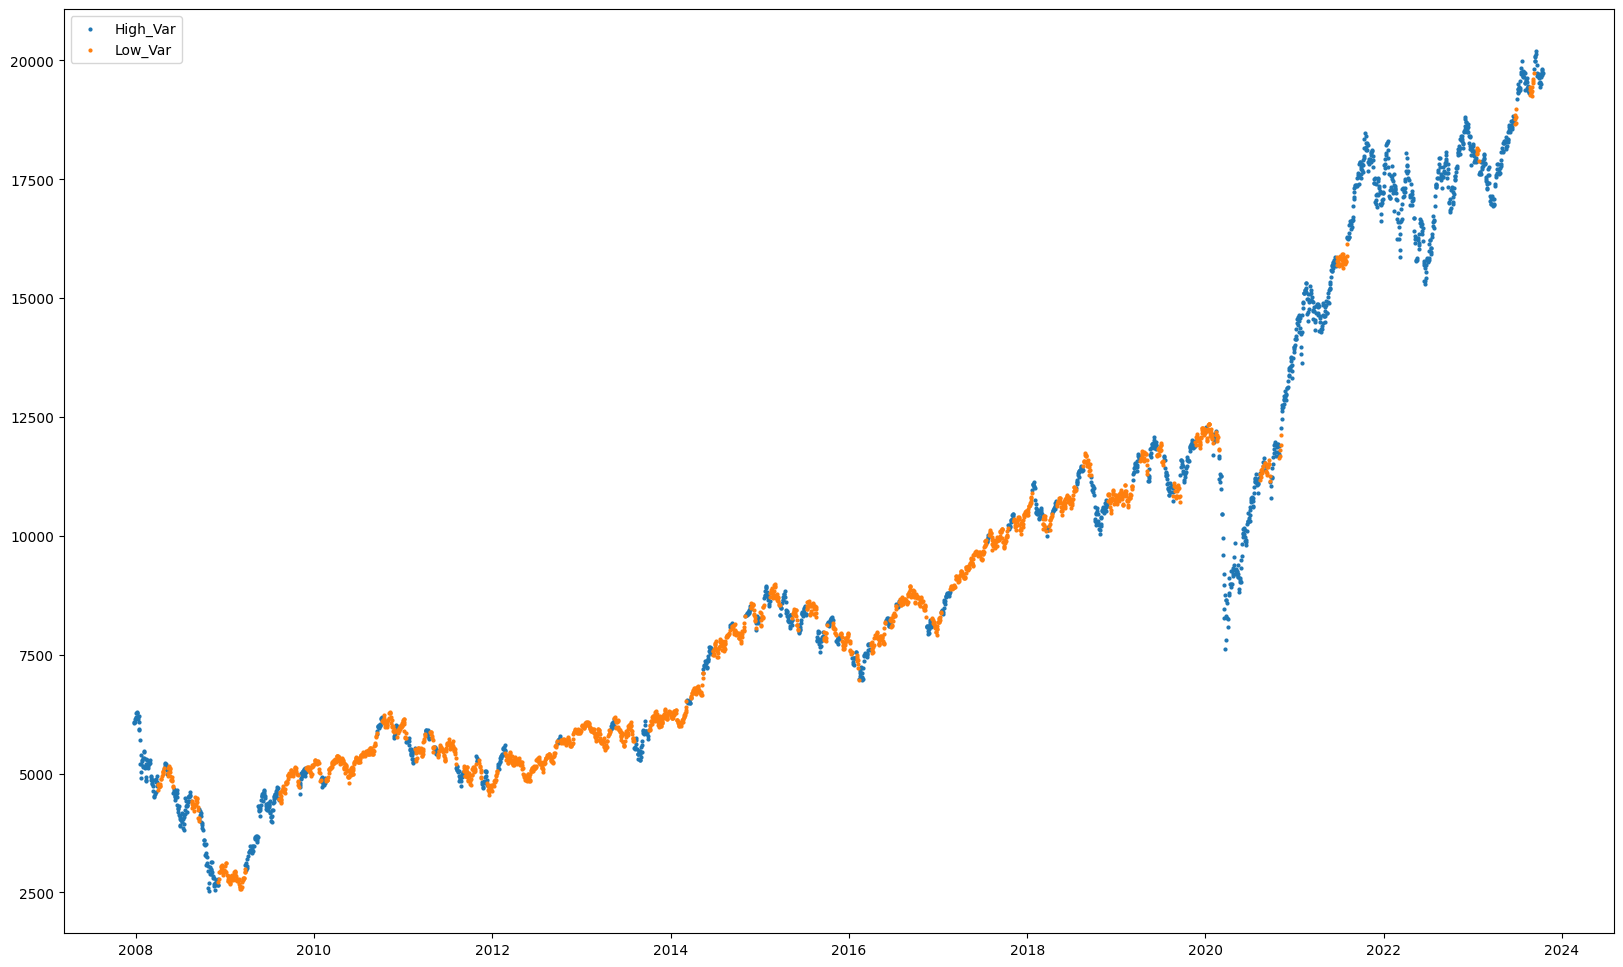

In [26]:
plt.figure(figsize = (20,12))
plt.scatter(data[data['Regime'] == 1].index, data[data['Regime'] == 1]['Close'], s = 4, label = 'High_Var')
plt.scatter(data[data['Regime'] == 0].index, data[data['Regime'] == 0]['Close'], s = 4, label = 'Low_Var')
plt.legend()

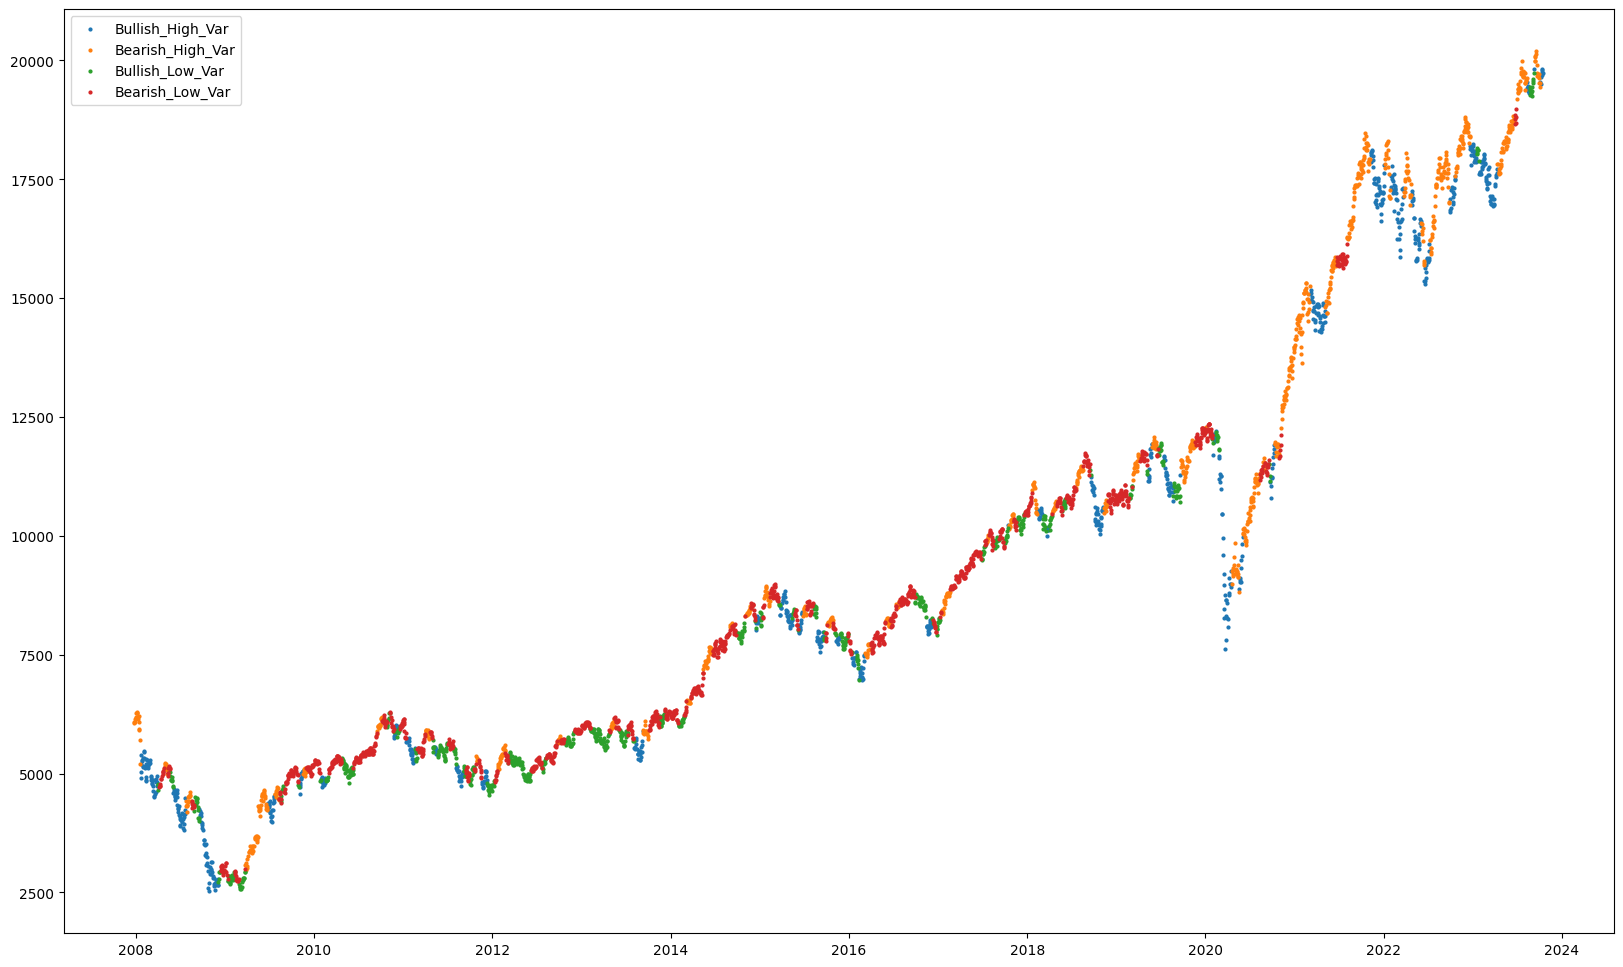

In [27]:
plt.figure(figsize = (20,12))
plt.scatter(data[(data['Regime'] == 1) & (data['Trend'] == 0)].index, data[(data['Regime'] == 1) & (data['Trend'] == 0)]['Close'], s = 4, label = 'Bullish_High_Var')
plt.scatter(data[(data['Regime'] == 1) & (data['Trend'] == 1)].index, data[(data['Regime'] == 1) & (data['Trend'] == 1)]['Close'], s = 4, label = 'Bearish_High_Var')
plt.scatter(data[(data['Regime'] == 0) & (data['Trend'] == 0)].index, data[(data['Regime'] == 0) & (data['Trend'] == 0)]['Close'], s = 4, label = 'Bullish_Low_Var')
plt.scatter(data[(data['Regime'] == 0) & (data['Trend'] == 1)].index, data[(data['Regime'] == 0) & (data['Trend'] == 1)]['Close'], s = 4, label = 'Bearish_Low_Var')
plt.legend()

In [28]:
from ta.volatility import BollingerBands
indicator_bb = BollingerBands(close=data["Close"], window=20, window_dev=1.5)
#data['bb_bbm_1.5'] = indicator_bb.bollinger_mavg()
#data['bb_bbh_1.5'] = indicator_bb.bollinger_hband()
#data['bb_bbl_1.5'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
data['bb_bbhi_1.5'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
data['bb_bbli_1.5'] = indicator_bb.bollinger_lband_indicator()

In [29]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5
Date,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0,0.0,0.0
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0,0.0,0.0
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0,0.0,0.0
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0,0.0,0.0
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0,0.0,0.0
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0,0.0,0.0
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0,0.0,0.0


In [30]:
from ta.momentum import RSIIndicator
indicator_rsi=RSIIndicator(close=data["Close"], window=14)
data['rsi']=indicator_rsi.rsi()

In [31]:
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi
Date,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0,0.0,0.0,NaN
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0,0.0,0.0,NaN
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0,0.0,0.0,NaN
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0,0.0,0.0,NaN
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0,0.0,0.0,51.613982
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0,0.0,0.0,55.720184
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0,0.0,0.0,55.002390


In [32]:
data['SMA_10']=data['Close'].rolling(10).mean()
data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10
Date,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0,0.0,0.0,51.613982,19590.929883
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0,0.0,0.0,55.720184,19605.594922
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0,0.0,0.0,55.002390,19613.350000


In [33]:
indicator_bb = BollingerBands(close=data["Close"], window=20, window_dev=1)
#data['bb_bbm_1.5'] = indicator_bb.bollinger_mavg()
#data['bb_bbh_1.5'] = indicator_bb.bollinger_hband()
#data['bb_bbl_1.5'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
data['bb_bbhi_1'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
data['bb_bbli_1'] = indicator_bb.bollinger_lband_indicator()

data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1
Date,,,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN,0.0,0.0
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0,0.0,0.0,51.613982,19590.929883,0.0,0.0
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0,0.0,0.0,55.720184,19605.594922,0.0,0.0
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0,0.0,0.0,55.002390,19613.350000,0.0,0.0


In [34]:

data.loc[(data['Trend']==0) & (data['Regime']==0), 'tan']='advance'
data.loc[(data['Trend']==0) & (data['Regime']==1), 'tan']='accumulation'
data.loc[(data['Trend']==1) & (data['Regime']==0), 'tan']='distribution'
data.loc[(data['Trend']==1) & (data['Regime']==1), 'tan']='decline'
data


,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1,tan
Date,,,,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0,0.0,0.0,51.613982,19590.929883,0.0,0.0,accumulation
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0,0.0,0.0,55.720184,19605.594922,0.0,0.0,accumulation
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0,0.0,0.0,55.002390,19613.350000,0.0,0.0,accumulation


In [35]:
from ta.volatility import AverageTrueRange
indicator_atr=AverageTrueRange(high=data["High"], low=data["Low"], close=data["Close"], window=14)
data["ATR"]=indicator_atr.average_true_range()

data

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1,tan,ATR
Date,,,,,,,,,,,,,,,,,,,
2007-12-26,5988.450195,6085.250000,5988.450195,6070.750000,6070.750000,0,160.915558,1.0,5767.558984,109.927063,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline,0.000000
2007-12-27,6069.000000,6110.850098,6060.200195,6081.500000,6081.500000,0,160.184624,1.0,5775.780986,97.174988,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline,0.000000
2007-12-28,6079.549805,6098.600098,6021.899902,6079.700195,6079.700195,0,149.477791,1.0,5784.013994,83.752075,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline,0.000000
2007-12-31,6095.000000,6167.750000,6095.000000,6138.600098,6138.600098,0,139.503161,1.0,5795.600000,65.114583,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline,0.000000
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0,138.125411,1.0,5811.467002,46.675028,1.0,0.0,0.0,NaN,NaN,0.0,0.0,decline,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19689.849609,216600,234.753555,1.0,19602.587148,-150.287516,0.0,0.0,0.0,51.613982,19590.929883,0.0,0.0,accumulation,162.234795
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19811.349609,213700,228.917078,1.0,19605.893125,-148.714600,0.0,0.0,0.0,55.720184,19605.594922,0.0,0.0,accumulation,161.314425
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900,222.491893,1.0,19606.697109,-146.383382,0.0,0.0,0.0,55.002390,19613.350000,0.0,0.0,accumulation,154.838422


In [36]:
price_min = data.Close.min()
price_max = data.Close.max()
diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

In [37]:
data=data.dropna()
data.iloc[0:55, :]

,Open,High,Low,Close,Adj Close,Volume,Volatility,Regime,SMA,Diff_SMA,Trend,bb_bbhi_1.5,bb_bbli_1.5,rsi,SMA_10,bb_bbhi_1,bb_bbli_1,tan,ATR
Date,,,,,,,,,,,,,,,,,,,
2008-01-14,6208.799805,6244.149902,6172.000000,6206.799805,6206.799805,0,184.025544,1.0,5925.854004,120.852091,1.0,0.0,0.0,60.418236,6217.939990,0.0,0.0,decline,103.999965
2008-01-15,6226.350098,6260.450195,6053.299805,6074.250000,6074.250000,0,183.868496,1.0,5930.010000,115.662496,1.0,0.0,0.0,40.301540,6210.929980,0.0,0.0,decline,111.367853
2008-01-16,6065.000000,6065.000000,5825.750000,5935.750000,5935.750000,0,173.106238,1.0,5930.077002,105.487488,1.0,0.0,0.0,29.317338,6186.564990,0.0,0.0,decline,121.163006
2008-01-17,5937.950195,6013.149902,5880.299805,5913.200195,5913.200195,0,158.640038,1.0,5931.395010,96.479146,1.0,0.0,0.0,27.980202,6160.030029,0.0,0.0,decline,121.997798
2008-01-18,5907.750000,5908.750000,5677.000000,5705.299805,5705.299805,0,164.163400,1.0,5929.771006,71.670817,1.0,0.0,0.0,19.258925,6103.130029,0.0,0.0,decline,130.155112
2008-01-21,5705.000000,5705.000000,4977.100098,5208.799805,5208.799805,0,248.744826,1.0,5918.300000,25.812500,1.0,0.0,0.0,10.689679,5996.100000,0.0,0.0,decline,172.872583
2008-01-22,5203.350098,5203.350098,4448.500000,4899.299805,4899.299805,0,361.064682,1.0,5902.310996,-52.199992,0.0,0.0,1.0,8.231055,5857.244971,0.0,1.0,accumulation,214.831671
2008-01-23,4903.049805,5328.049805,4891.600098,5203.399902,5203.399902,0,403.523405,1.0,5894.036992,-119.387512,0.0,0.0,1.0,26.193407,5750.384961,0.0,1.0,accumulation,230.661530
2008-01-24,5208.000000,5357.200195,4995.799805,5033.450195,5033.450195,0,453.383579,1.0,5880.797998,-194.016683,0.0,0.0,1.0,23.432939,5638.034961,0.0,1.0,accumulation,240.000020


In [38]:
list1=data.tan.values.tolist()

In [39]:
len(list1)

3861

In [40]:

data['Buy_Signal_Adv']= np.full((len(list1), 1), 0, dtype=int)
data['Sell_Signal_Adv']= np.full((len(list1), 1), 0, dtype=int)
data['Buy_Signal_Acc']= np.full((len(list1), 1), 0, dtype=int)
data['Sell_Signal_Acc']= np.full((len(list1), 1), 0, dtype=int)
data['Buy_Signal_Dist']= np.full((len(list1), 1), 0, dtype=int)
data['Sell_Signal_Dist']= np.full((len(list1), 1), 0, dtype=int)
data['Buy_Signal_Dec']= np.full((len(list1), 1), 0, dtype=int)
data['Sell_Signal_Dec']= np.full((len(list1), 1), 0, dtype=int)
for i in range(len(list1)):
  rg=list1[i]
  t=-1
  for j in range(i+1, len(list1)):
    if (list1[j]!=rg):
      t=j-1
      break
  if t==-1:
     t=len(list1)-1
  for k in range (i, t+1):
    if rg=='advance':
      data['Buy_Signal_Adv'].iloc[k]= 1 if data['bb_bbli_1.5'].iloc[k]==1.0 else 0
      data['Buy_Signal_Adv'].iloc[k]= 1 if data['rsi'].iloc[k]<40.0 else data['Buy_Signal_Adv'].iloc[k]
      data['Sell_Signal_Adv'].iloc[k]= 1 if data['rsi'].iloc[k]>65.0 else 0
      data['Sell_Signal_Adv'].iloc[k]= 1 if data['Close'].iloc[k]<data['SMA_10'].iloc[k] else data['Sell_Signal_Adv'].iloc[k]
    elif rg=='accumulation':
      data['Buy_Signal_Acc'].iloc[k]= 1 if data['bb_bbli_1'].iloc[k]==1.0 else 0
      data['Buy_Signal_Acc'].iloc[k]= 1 if data['rsi'].iloc[k]<40.0 else data['Buy_Signal_Acc'].iloc[k]
      data['Sell_Signal_Acc'].iloc[k]= 1 if data['rsi'].iloc[k]>60.0 else 0
      data['Sell_Signal_Acc'].iloc[k]= 1 if data['Close'].iloc[k]<data['SMA_10'].iloc[k] else data['Sell_Signal_Acc'].iloc[k]
    elif rg=='distribution':
      data['Sell_Signal_Dist'].iloc[k]= 1 if data['bb_bbhi_1.5'].iloc[k]==1.0 else 0
      data['Sell_Signal_Dist'].iloc[k]= 1 if data['rsi'].iloc[k]>60.0 else data['Sell_Signal_Dist'].iloc[k]
      data['Buy_Signal_Dist'].iloc[k]= 1 if data['rsi'].iloc[k]<30.0 else 0
      data['Buy_Signal_Dist'].iloc[k]= 1 if data['Close'].iloc[k]>data['SMA_10'].iloc[k] else data['Buy_Signal_Dist'].iloc[k]
    elif rg=='decline':
      data['Sell_Signal_Dec'].iloc[k]= 1 if data['bb_bbhi_1.5'].iloc[k]==1.0 else 0
      data['Sell_Signal_Dec'].iloc[k]= 1 if data['rsi'].iloc[k]>65.0 else data['Sell_Signal_Dec'].iloc[k]
      data['Buy_Signal_Dec'].iloc[k]= 1 if data['rsi'].iloc[k]<25.0 else 0
      data['Buy_Signal_Dec'].iloc[k]= 1 if data['Close'].iloc[k]>data['SMA_10'].iloc[k] else data['Buy_Signal_Dec'].iloc[k]
  i=t+1



<ipython-input-40-0a23ef40462d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal_Adv']= np.full((len(list1), 1), 0, dtype=int)
<ipython-input-40-0a23ef40462d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell_Signal_Adv']= np.full((len(list1), 1), 0, dtype=int)
<ipython-input-40-0a23ef40462d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [41]:
Buying_dates_adv=[]
Selling_dates_adv=[]

for i in range (len(data)):
  if data['Buy_Signal_Adv'].iloc[i]==1:
    if (i+1)<len(data):
      Buying_dates_adv.append(data.iloc[i+1].name)
    else:
       Buying_dates_adv.append(data.iloc[i].name)
    for j in range (1, len(data)-i):
      if data['Sell_Signal_Adv'].iloc[i]==1:
        if (i+j+1)<len(data):
          Selling_dates_adv.append(data.iloc[i+j+1].name)
        else:
          Selling_dates_adv.append(data.iloc[i+j].name)
        break
      elif j==(len(data)-i-1):
        Selling_dates_adv.append(data.iloc[i+j].name)

In [42]:
frame_adv=pd.DataFrame({'Buying_dates_adv':Buying_dates_adv, 'Selling_dates_adv':Selling_dates_adv})
actualtrades_adv= frame_adv[frame_adv.Buying_dates_adv>frame_adv.Selling_dates_adv.shift(1)]
actualtrades_adv= frame_adv[:1].append(actualtrades_adv)
profits_adv= \
data.loc[actualtrades_adv.Selling_dates_adv].Open.values - data.loc[actualtrades_adv.Buying_dates_adv].Open.values
relprofits_adv= \
(data.loc[actualtrades_adv.Selling_dates_adv].Open.values - data.loc[actualtrades_adv.Buying_dates_adv].Open.values)/data.loc[actualtrades_adv.Buying_dates_adv].Open.values

<ipython-input-42-9a1518854857>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualtrades_adv= frame_adv[:1].append(actualtrades_adv)


In [43]:
Buying_dates_acc=[]
Selling_dates_acc=[]

for i in range (len(data)):
  if data['Buy_Signal_Acc'].iloc[i]==1:
    if (i+1)<len(data):
      Buying_dates_acc.append(data.iloc[i+1].name)
    else:
       Buying_dates_acc.append(data.iloc[i].name)
    for j in range (1, len(data)-i):
      if data['Sell_Signal_Acc'].iloc[i]==1:
        if (i+j+1)<len(data):
          Selling_dates_acc.append(data.iloc[i+j+1].name)
        else:
          Selling_dates_acc.append(data.iloc[i+j].name)
        break
      elif j==(len(data)-i-1):
        Selling_dates_acc.append(data.iloc[i+j].name)

In [44]:
frame_acc=pd.DataFrame({'Buying_dates_acc':Buying_dates_acc, 'Selling_dates_acc':Selling_dates_acc})
actualtrades_acc= frame_acc[frame_acc.Buying_dates_acc>frame_acc.Selling_dates_acc.shift(1)]
actualtrades_acc= frame_acc[:1].append(actualtrades_acc)
profits_acc= \
data.loc[actualtrades_acc.Selling_dates_acc].Open.values - data.loc[actualtrades_acc.Buying_dates_acc].Open.values
relprofits_acc= \
(data.loc[actualtrades_acc.Selling_dates_acc].Open.values - data.loc[actualtrades_acc.Buying_dates_acc].Open.values)/data.loc[actualtrades_acc.Buying_dates_acc].Open.values

<ipython-input-44-bc5799109c0c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualtrades_acc= frame_acc[:1].append(actualtrades_acc)


In [45]:
Buying_dates_dist=[]
Selling_dates_dist=[]

for i in range (len(data)):
  if data['Sell_Signal_Dist'].iloc[i]==1:
    if (i+1)<len(data):
      Selling_dates_dist.append(data.iloc[i+1].name)
    else:
       Selling_dates_dist.append(data.iloc[i].name)
    for j in range (1, len(data)-i):
      if data['Buy_Signal_Dist'].iloc[i]==1:
        if (i+j+1)<len(data):
          Buying_dates_dist.append(data.iloc[i+j+1].name)
        else:
          Buying_dates_dist.append(data.iloc[i+j].name)
        break
      elif j==(len(data)-i-1):
        Buying_dates_dist.append(data.iloc[i+j].name)

In [46]:
frame_dist=pd.DataFrame({'Selling_dates_dist':Selling_dates_dist, 'Buying_dates_dist':Buying_dates_dist})
actualtrades_dist= frame_dist[frame_dist.Selling_dates_dist>frame_dist.Buying_dates_dist.shift(1)]
actualtrades_dist= frame_dist[:1].append(actualtrades_dist)
profits_dist= \
data.loc[actualtrades_dist.Buying_dates_dist].Open.values - data.loc[actualtrades_dist.Selling_dates_dist].Open.values
relprofits_dist= \
(data.loc[actualtrades_dist.Buying_dates_dist].Open.values - data.loc[actualtrades_dist.Selling_dates_dist].Open.values)/data.loc[actualtrades_dist.Selling_dates_dist].Open.values

<ipython-input-46-2efa011023ed>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualtrades_dist= frame_dist[:1].append(actualtrades_dist)


In [47]:
Buying_dates_dec=[]
Selling_dates_dec=[]

for i in range (len(data)):
  if data['Sell_Signal_Dec'].iloc[i]==1:
    if (i+1)<len(data):
      Selling_dates_dec.append(data.iloc[i+1].name)
    else:
       Selling_dates_dec.append(data.iloc[i].name)
    for j in range (1, len(data)-i):
      if data['Buy_Signal_Dec'].iloc[i]==1:
        if (i+j+1)<len(data):
          Buying_dates_dec.append(data.iloc[i+j+1].name)
        else:
          Buying_dates_dec.append(data.iloc[i+j].name)
        break
      elif j==(len(data)-i-1):
        Buying_dates_dec.append(data.iloc[i+j].name)

In [48]:
frame_dec=pd.DataFrame({'Selling_dates_dec':Selling_dates_dec, 'Buying_dates_dec':Buying_dates_dec})
actualtrades_dec= frame_dec[frame_dec.Selling_dates_dec>frame_dec.Buying_dates_dec.shift(1)]
actualtrades_dec= frame_dec[:1].append(actualtrades_dec)
profits_dec= \
data.loc[actualtrades_dec.Buying_dates_dec].Open.values - data.loc[actualtrades_dec.Selling_dates_dec].Open.values
relprofits_dec= \
(data.loc[actualtrades_dec.Buying_dates_dec].Open.values - data.loc[actualtrades_dec.Selling_dates_dec].Open.values)/data.loc[actualtrades_dec.Selling_dates_dec].Open.values

<ipython-input-48-eb6c57b21b24>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actualtrades_dec= frame_dec[:1].append(actualtrades_dec)


In [49]:
total_profits=np.concatenate((profits_adv, profits_acc, profits_dist, profits_dec), axis=0)
total_relprofits= np.concatenate((relprofits_adv,relprofits_acc,relprofits_dist,relprofits_dec), axis=0)

In [50]:
total_relprofits.mean()*100 #avg profit per trade

5.155827474676357

In [51]:
arr= 100000 * (total_relprofits +1 ).cumprod()
final_val= arr[len(arr)-1]
print(final_val)
#final amont if started with Rs. 1 lakh

1470918676.0969846


In [52]:
#CAGR
cagr= (((final_val/100000.0)**(365.0/5688))-1)*100
cagr

85.11215062554172

In [53]:
#maximum drawdown
max_draw=min(total_relprofits)
(max_draw*-1)*100

5.4403011196013145

In [54]:
win_ratio = len([i for i in total_profits if i>0])/len(total_profits) #win ratio
print(win_ratio)

0.5569620253164557
